**Proyecto Equipo D**

![An image](https://media.timtul.com/media/users/hackaboss_300_20211202185733.png)

**Proyecto II Grupo D** del curso de Ciencia de Datos de Hack'a'Boss **01 Julio 2024** (DSB10RT).

Se ha seleccionado desarrollar el proyecto con:

**Machine Learning**
*   Aprendizaje supervisado.





# 01. Definición del problema

Partimos por la definición del problema o el objetivo del proyecto.
- El objetivo es predecir si una persona tiene enfermedad cardíaca (HeartDisease) en base a las características proporcionadas en el dataset.

¿Qué variable queremos predecir?
- HeartDisease (clasificación binaria: 'Yes' o 'No')

¿Es una regresión o una clasificación?
- Clasificación

¿Qué datos son necesarios para predecir esa variable?
- Las características proporcionadas en el dataset, que incluyen factores de salud y hábitos de vida de los individuos.

¿Cómo consigo esos datos?
- Los datos ya están disponibles en el archivo 'heart_2020_cleaned.csv'.

# 02. Recopilación de Datos



El data set seleccionado fue descargado del siguiente enlace:

https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Behavioral-Risk-Factor-Surveillance-System-BRFSS-N/ikwk-8git/data

# 03. Exploratory Data Analysis (EDA) y Procesamiento de Datos

Para seguir con el proyecto es necesario conocer los datos, para esto vamos a utilizar las herramientas de EDA, es decir, visualizaciones y estadística.

También es necesario procesar los datos antes de implementarlos en el modelo, esto comprende:

*   NaN's.

*   Outliers.

*   Variables no numéricas.

*   Dimensionalidad.

*   Normalización de Datos.

Esta parte del proyecto se debe adaptar a los datos.



## Importar Librerias Requeridas

In [1]:
!pip install scikit-learn
!pip install category_encoders
!pip install unidecode
!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import sqrt
from unidecode import unidecode

# Modelo
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Herramienta Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

# Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Validaciones
from sklearn.model_selection import KFold, LeaveOneOut

# Importar herramientas de prepocesamiento necesarias
...

Ellipsis

## Exploración y limpieza Inicial del DataFrame

Carga del DataFrame

In [3]:
df = pd.read_csv("Data/heart_2020_cleaned.csv")

Configurar Pandas para mostrar todas las columnas

In [4]:
pd.set_option('display.max_columns', None)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


Resumen informativo de las caracteristicas basicas del DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Representacion Grafica del Porcentaje de NAN y no NAN en el DataFrame en una Escala del 0 al 1

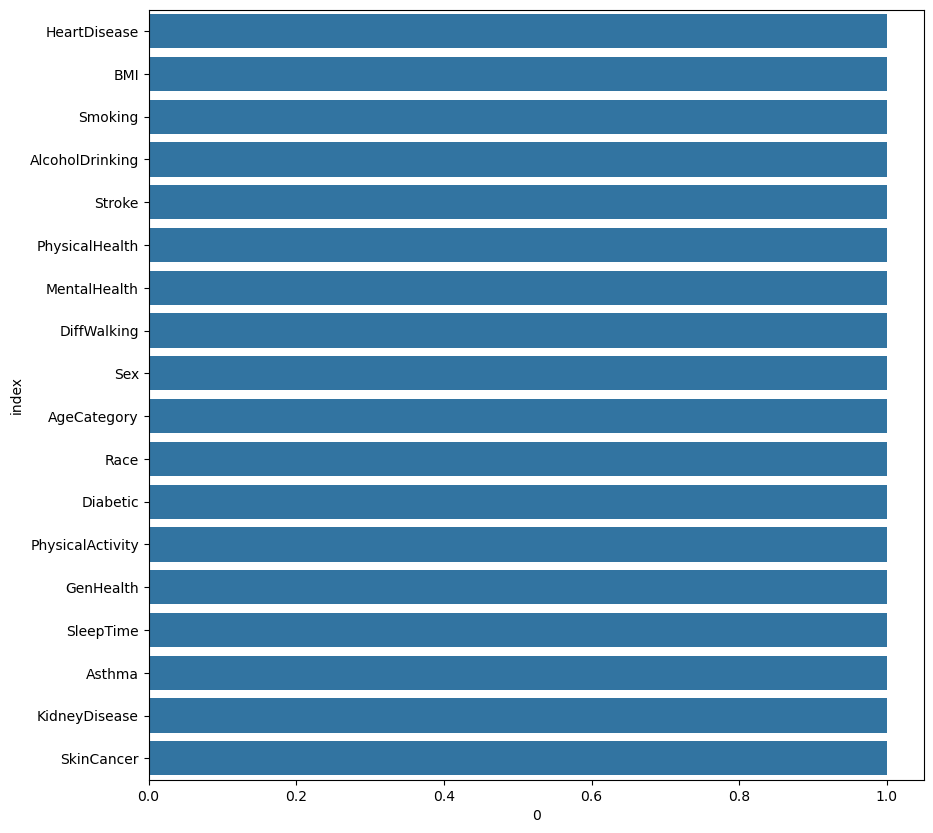

In [6]:
plt.figure(figsize=(10,10))
sns.barplot((pd.DataFrame(df.count())/df.shape[0]).reset_index(), x=0, y='index')
plt.show()

Descripción Estadistica de las variables numericas

In [7]:
stats = df.describe()
stats

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
# Funcion para limpiar nombres de columnas de espacios y caracteres especiales

def limpiar_nomb_colums(nombre_columna):
    nombre_columna = nombre_columna.strip()
    nombre_columna = nombre_columna.replace(' ', '_')
    nombre_columna = unidecode(nombre_columna)
    return nombre_columna


In [9]:
# Funcion para limpiar los espacios en blanco al inicio y al final

def limpiar_espacios_blancos(x):
  if isinstance(x, str):
    x = x.str.strip()
  else:
    x = x
  return x

In [10]:
# Funcion para cambiar valores None por NaN

def llenar_nan(x):
  if isinstance(x, str):
    x = x.fillna(np.NaN)
  else:
    x = x
  return x

In [11]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Aplicar limpieza General del DataFrame

In [12]:
df.apply(llenar_nan)
nombre_columnas_limpias = [limpiar_nomb_colums(col) for col in df.columns]
df.columns = nombre_columnas_limpias
df.apply(limpiar_espacios_blancos)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


Verificacion de Nombre de Columnas despues de la Limpieza

In [13]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Columna: HeartDisease

In [14]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['HeartDisease'].nunique()

2

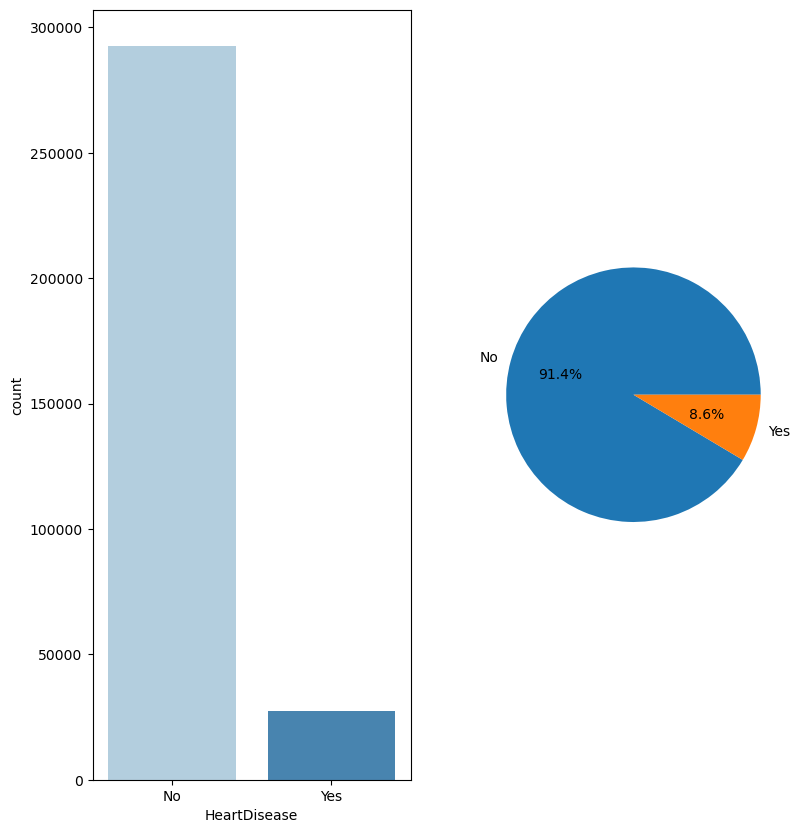

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

sns.countplot(x='HeartDisease', palette='Blues', hue='HeartDisease', data=df, ax=axes[0])
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', labels=df['HeartDisease'].unique())
plt.subplots_adjust(left=0.2)
plt.show()

## Columna: BMI

In [17]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [18]:
df['BMI'].nunique()

3604

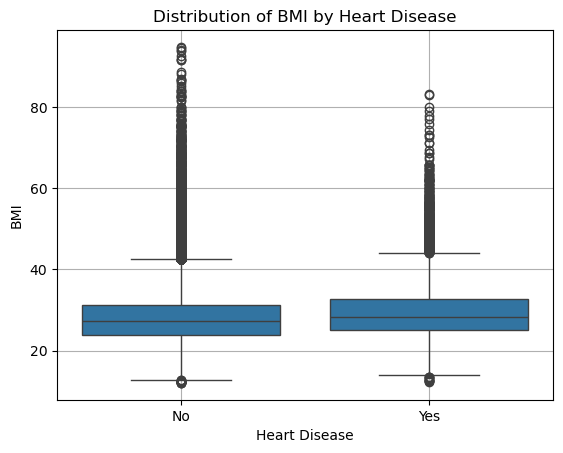

In [19]:
sns.boxplot(data = df, x = "HeartDisease", y = "BMI")
plt.xlabel("Heart Disease")
plt.ylabel("BMI")
plt.title("Distribution of BMI by Heart Disease")
plt.grid(True)
plt.show()

# Aplicar logaritmo

## Columna: Smoking

In [20]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df['Smoking'].nunique()

2

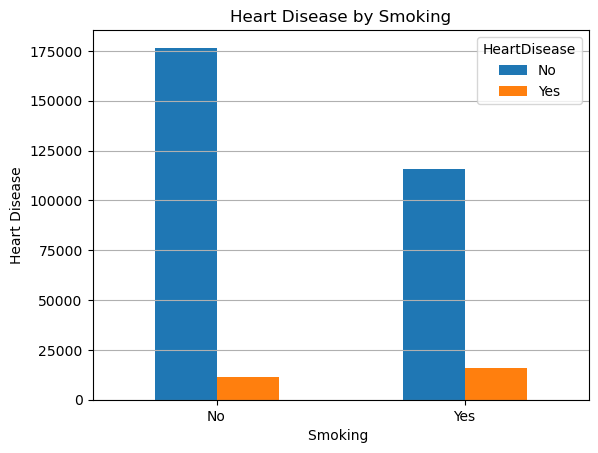

In [22]:
SMxHD = df.groupby(["Smoking", "HeartDisease"])["HeartDisease"].count().unstack()
SMxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Smoking ")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Smoking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: AlcoholDrinking

In [23]:
df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['AlcoholDrinking'].nunique()

2

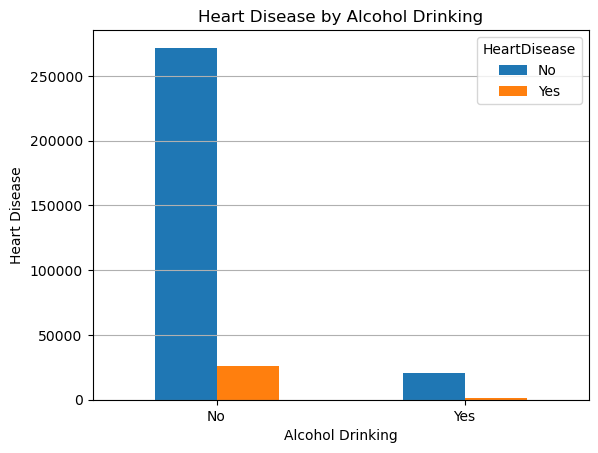

In [25]:
ADxHD = df.groupby(["AlcoholDrinking", "HeartDisease"])["HeartDisease"].count().unstack()
ADxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Alcohol Drinking")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Alcohol Drinking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: Stroke

In [26]:
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['Stroke'].nunique()

2

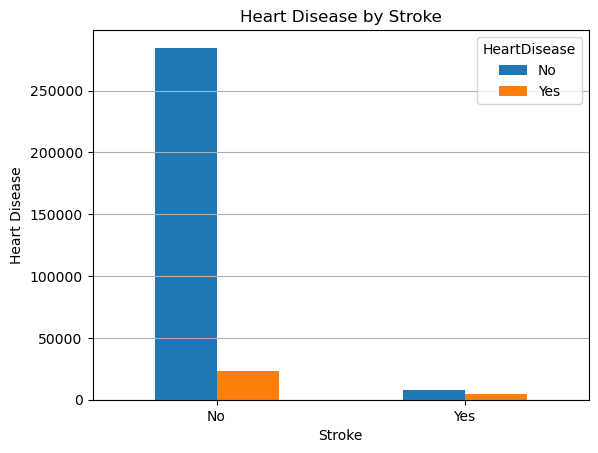

In [28]:
STxHD = df.groupby(["Stroke", "HeartDisease"])["HeartDisease"].count().unstack()
STxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Stroke")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Stroke")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: PhysicalHealth

In [29]:
df['PhysicalHealth'].unique()

array([ 3,  0, 20, 28,  6, 15,  5, 30,  7,  1,  2, 21,  4, 10, 14, 18,  8,
       25, 16, 29, 27, 17, 24, 12, 23, 26, 22, 19,  9, 13, 11])

In [30]:
df['PhysicalHealth'].nunique()

31

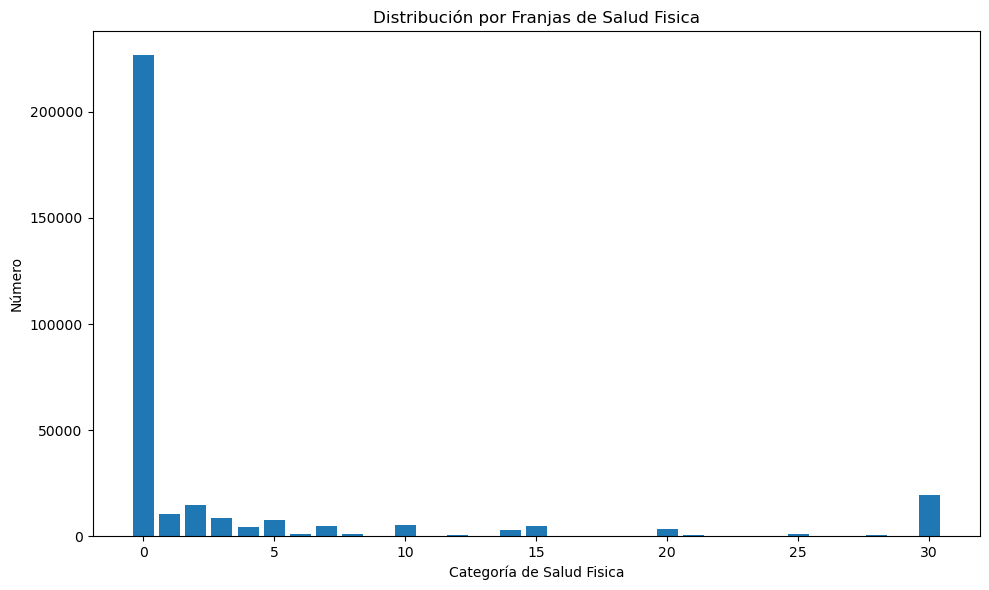

In [31]:
phys_counts = df['PhysicalHealth'].value_counts()  # Count occurrences of each age category

plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(phys_counts.index, phys_counts.values)  # Create bar chart
plt.title('Distribución por Franjas de Salud Fisica')  # Set title
plt.xlabel('Categoría de Salud Fisica')  # Set x-axis label
plt.ylabel('Número')  # Set y-axis label
plt.tight_layout()  # Adjust layout for better presentation

plt.show()  # Display the chart

## Columna: MentalHealth

In [32]:
df['MentalHealth'].unique()

array([30,  0,  2,  5, 15,  8,  4,  3, 10, 14, 20,  1,  7, 24,  9, 28, 16,
       12,  6, 25, 17, 18, 21, 29, 22, 13, 23, 27, 26, 11, 19])

In [33]:
df['MentalHealth'].nunique()

31

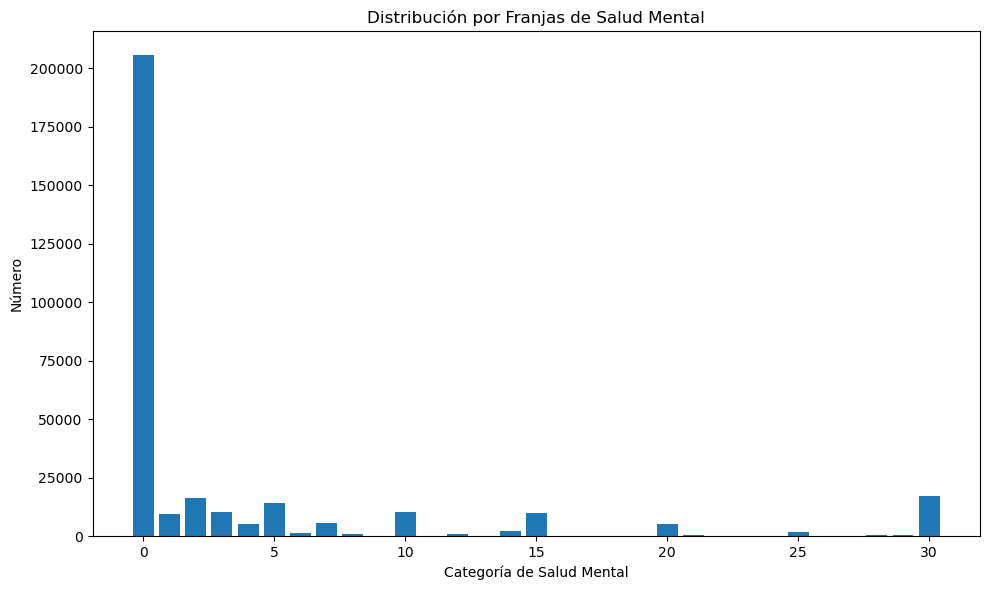

In [34]:
mtl_counts = df['MentalHealth'].value_counts()  # Count occurrences of each age category

plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(mtl_counts.index, mtl_counts.values)  # Create bar chart
plt.title('Distribución por Franjas de Salud Mental')  # Set title
plt.xlabel('Categoría de Salud Mental')  # Set x-axis label
plt.ylabel('Número')  # Set y-axis label
plt.tight_layout()  # Adjust layout for better presentation

plt.show()  # Display the chart

## Columna: DiffWalking

In [35]:
df['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

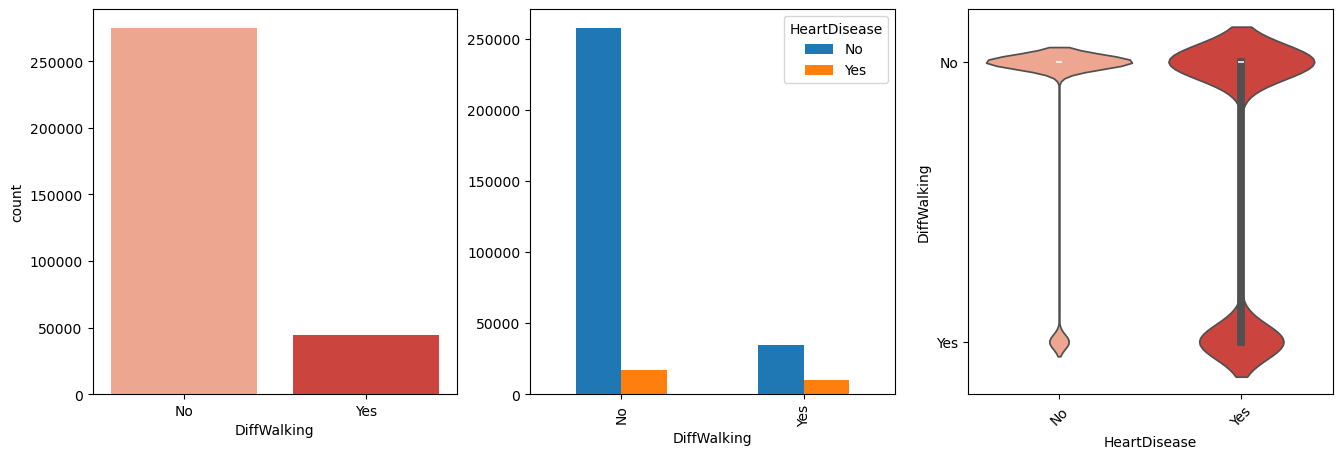

In [36]:
# Graficos 'DiffWalking'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='DiffWalking', data=df, hue='DiffWalking', palette='Reds', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['DiffWalking', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='DiffWalking', data=df, hue='HeartDisease', palette='Reds', ax=axes[2])
plt.show()

## Columna: Sex

In [37]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

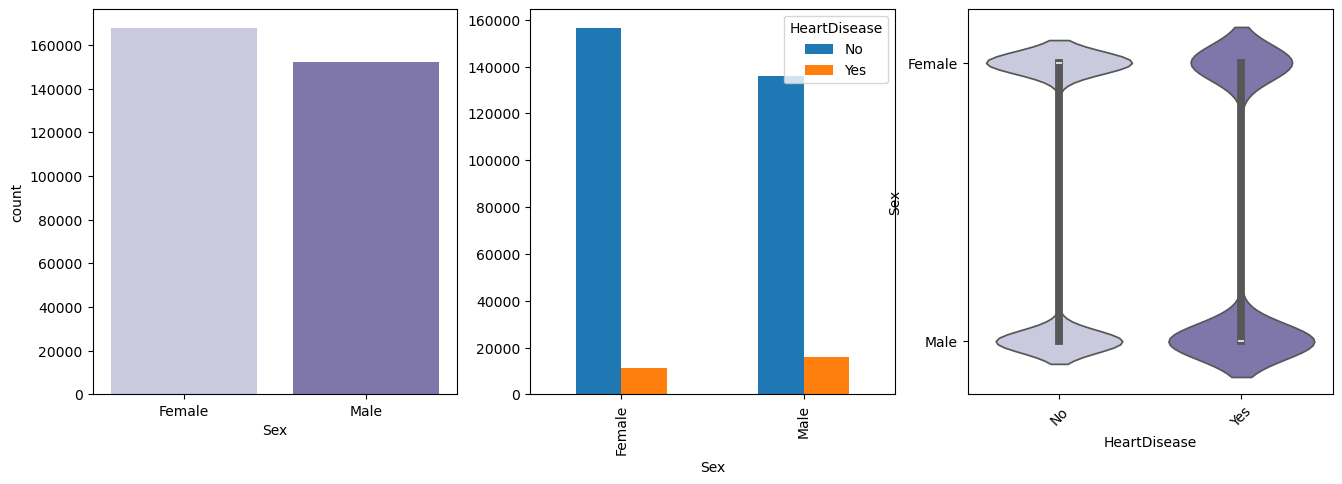

In [38]:
# Graficos 'Sex'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Sex', data=df, hue='Sex', palette='Purples', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Sex', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Sex', data=df, hue='HeartDisease', palette='Purples', ax=axes[2])
plt.show()

## Columna: AgeCategory

In [39]:
# 2024-07-02 AGM
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [40]:
df['AgeCategory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: AgeCategory
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


### Alternativa 1 (OneHotEncoder)

In [41]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['AgeCategory']])
df_age_category = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['AgeCategory']))
df_age_category.sample(5)

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
93254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51777,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
df_age_category = df_age_category.astype(int)
df_age_category.dtypes

AgeCategory_18-24          int64
AgeCategory_25-29          int64
AgeCategory_30-34          int64
AgeCategory_35-39          int64
AgeCategory_40-44          int64
AgeCategory_45-49          int64
AgeCategory_50-54          int64
AgeCategory_55-59          int64
AgeCategory_60-64          int64
AgeCategory_65-69          int64
AgeCategory_70-74          int64
AgeCategory_75-79          int64
AgeCategory_80 or older    int64
dtype: object

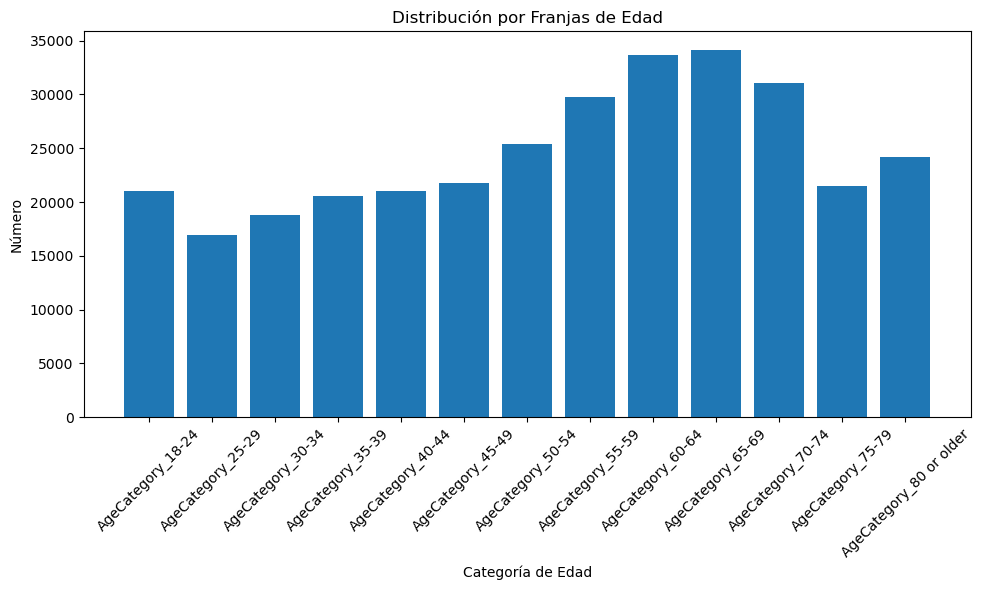

In [43]:
suma_edades = df_age_category.sum(axis = 0)

plt.figure(figsize=(10, 6))
plt.bar(suma_edades.index, suma_edades.values)
plt.title('Distribución por Franjas de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Alternativa 2 (map)

In [44]:
# 2024-07-04 AGM

df_age_category_map = df['AgeCategory'].map({'18-24':0,
                                           '25-29':1,
                                           '30-34':2,
                                           '35-39':3,
                                           '40-44':4,
                                           '45-49':5,
                                           '50-54':6,
                                           '55-59':7,
                                           '60-64':8,
                                           '65-69':9,
                                           '70-74':10,
                                           '75-79':11,
                                           '80 or older':12})
df_age_category_map.sample(5)

189184    12
308046     5
219206     1
19741     10
7383       2
Name: AgeCategory, dtype: int64

### Alternativa 3(if/elif)

In [45]:
def Age_Category(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == '18-24':
    return 0
  elif x == '25-29':
    return 1
  elif x == '30-34':
    return 2
  elif x == '35-39':
    return 3
  elif x == '40-44':
    return 4
  elif x == '45-49':
    return 5
  elif x == '50-54':
    return 6
  elif x == '55-59':
    return 7
  elif x == '60-64':
    return 8
  elif x == '65-69':
    return 9
  elif x == '70-74':
    return 10
  elif x == '75-79':
    return 11
  elif x == '80 or older':
    return 12

In [46]:
df_age_category_if_elif = df['AgeCategory'].apply(Age_Category)
df_age_category_if_elif.sample(5)

154592    12
275872     9
80927      4
120666     2
12909      7
Name: AgeCategory, dtype: int64

## Columna: Race

In [47]:
# 2024-07-02 AGM

df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [48]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['Race']])
df_race = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['Race']))
df_race.sample(5)

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
101116,0.0,0.0,0.0,0.0,0.0,1.0
79576,0.0,0.0,0.0,0.0,0.0,1.0
101528,0.0,0.0,1.0,0.0,0.0,0.0
305201,0.0,0.0,0.0,0.0,0.0,1.0
51566,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
df_race = df_race.astype(int)
df_race.sample(5)

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
234015,1,0,0,0,0,0
79958,0,0,0,0,0,1
190491,0,0,0,0,0,1
135196,0,0,0,0,0,1
54663,0,0,0,0,0,1


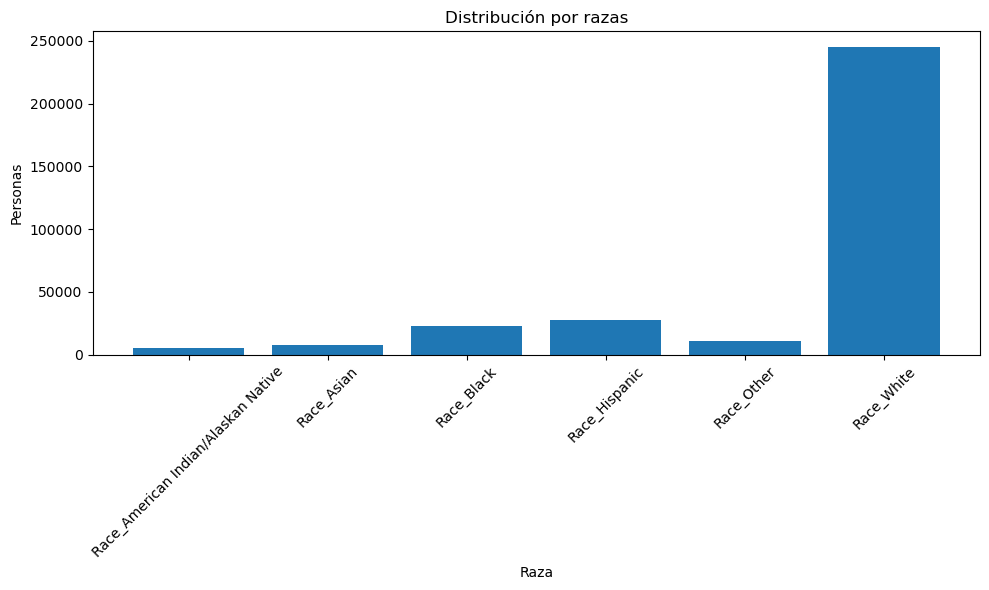

In [50]:
suma_razas = df_race.sum(axis = 0)

plt.figure(figsize = (10, 6))
plt.bar(suma_razas.index, suma_razas.values)
plt.title('Distribución por razas')
plt.xlabel('Raza')
plt.ylabel('Personas')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()


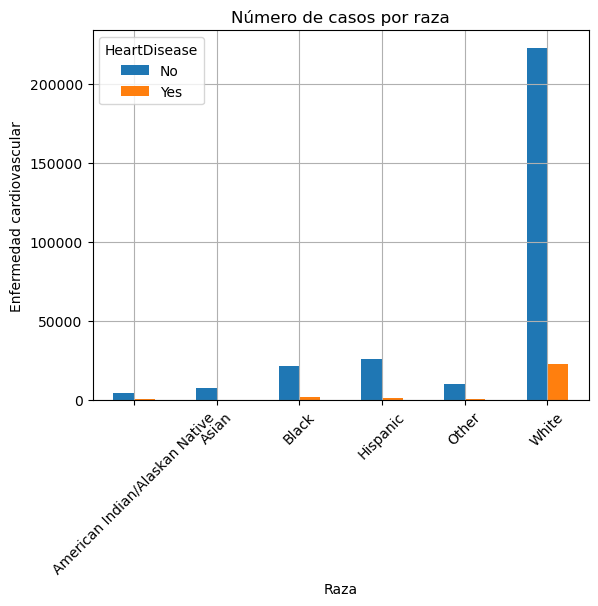

In [51]:
race_vs_hd = df.groupby(['Race', 'HeartDisease'])['HeartDisease'].count().unstack()
race_vs_hd.plot(kind = 'bar', stacked = False)
plt.xlabel('Raza')
plt.ylabel('Enfermedad cardiovascular')
plt.title('Número de casos por raza')
plt.xticks(rotation = 45)
plt.grid(True)

plt.show()

In [52]:
# Experimento con plotly.express https://plotly.com/python/bar-charts/
import plotly.express as px
race_vs_hd = df.groupby(['Race', 'HeartDisease']).size().reset_index(name='Casos')
fig = px.histogram(race_vs_hd,
                   x = 'Race',
                   y = 'Casos',
                   color = 'HeartDisease',
                   barmode = 'group',
                   height = 600,
                   width = 1024,
                   labels = {
                       'Race': 'Raza',
                       'Casos': 'Personas'
                   },
                   title = 'Enfermedad cardiovascular por raza')
fig.show()

## Columna: Diabetic

In [53]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [54]:
df['Diabetic'].nunique()

4

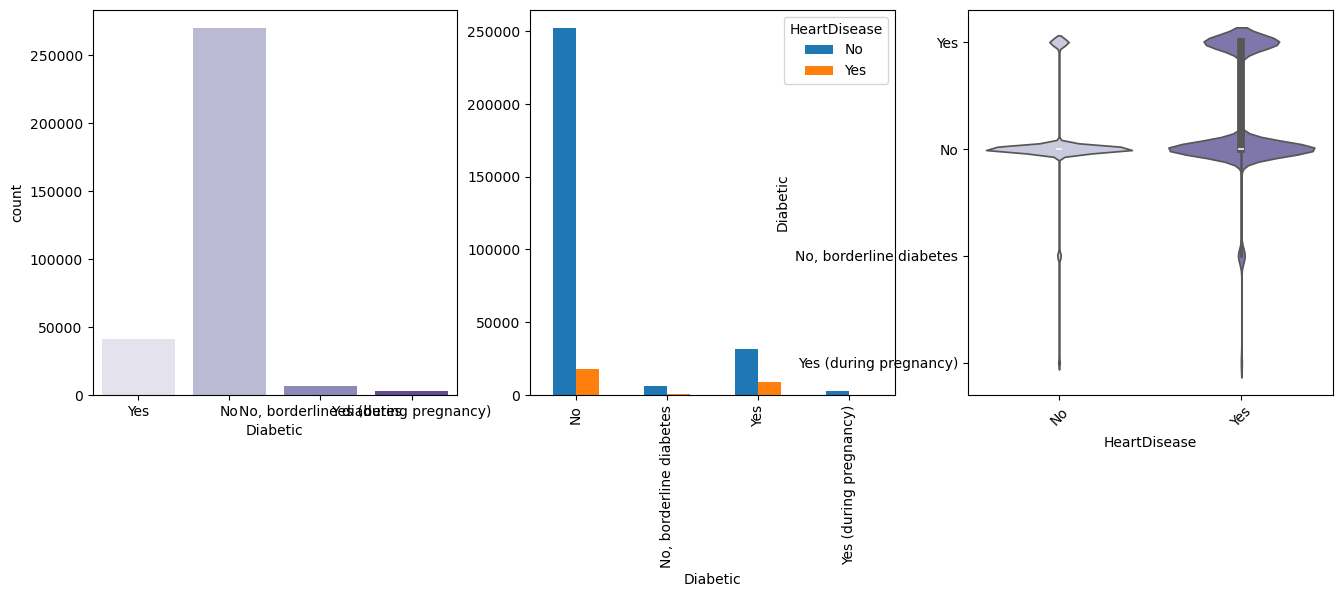

In [55]:
# Graficos 'Diabetic'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Diabetic', data=df, hue='Diabetic', palette='Purples', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Diabetic', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Diabetic', data=df, hue='HeartDisease', palette='Purples', ax=axes[2])
plt.show()

## Columna: PhysicalActivity

In [56]:
df['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

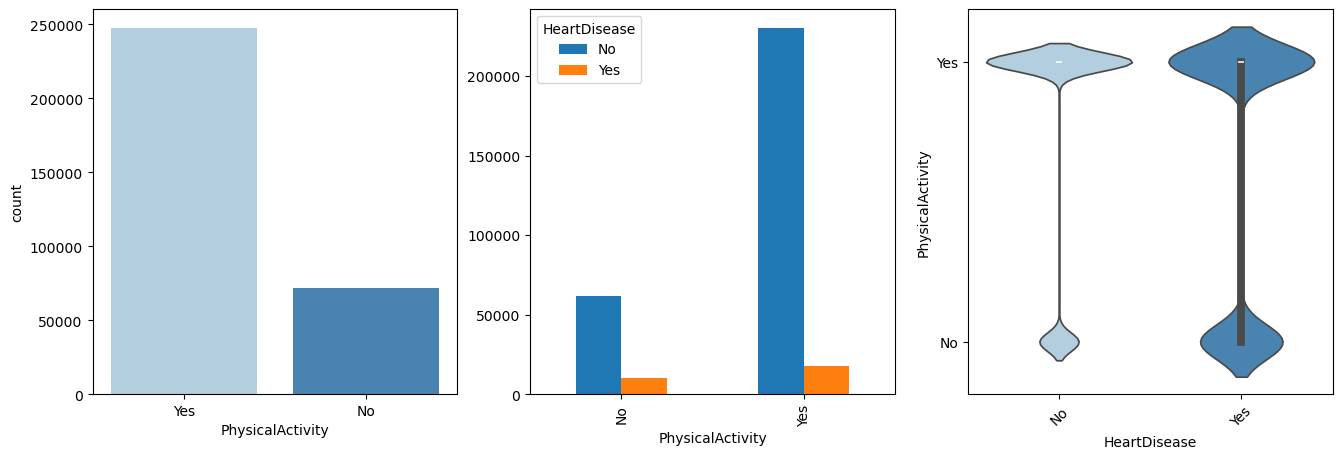

In [57]:
# Graficos 'Physical Activity'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='PhysicalActivity', data=df, hue='PhysicalActivity', palette='Blues', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['PhysicalActivity', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='PhysicalActivity', data=df, hue='HeartDisease', palette='Blues', ax=axes[2])
plt.show()

## Columna: GenHealth

In [58]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [59]:
df['GenHealth'].nunique()

5

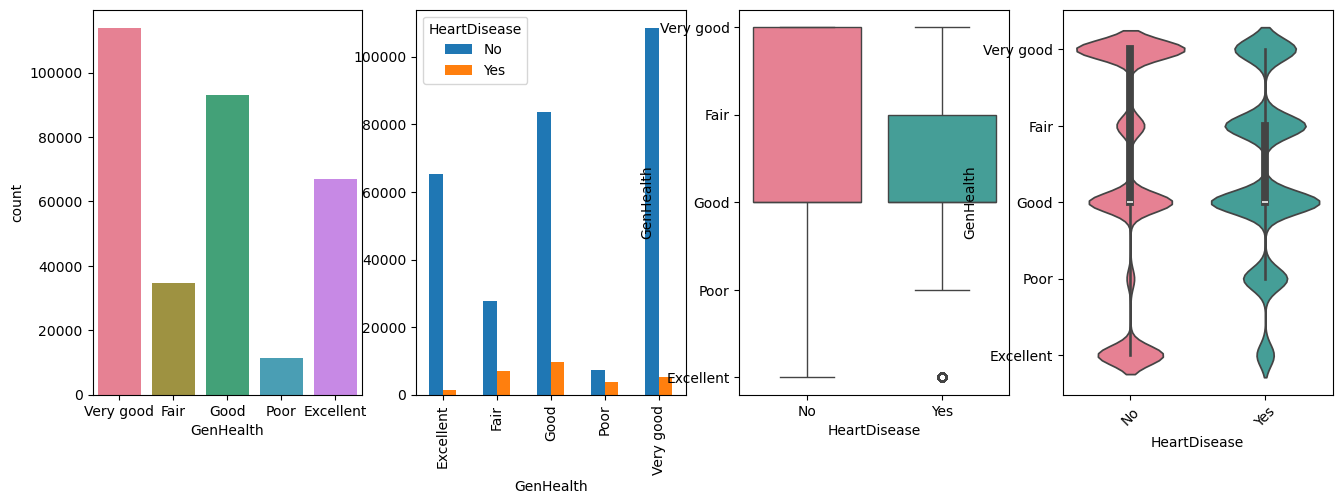

In [60]:
# Graficos 'GenHealth'

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.countplot(x='GenHealth', data=df, hue='GenHealth', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['GenHealth', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.boxplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
sns.violinplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[3])
plt.show()

## Columna: SleepTime

In [61]:
df['SleepTime'].unique()

array([ 5,  7,  8,  6, 12,  4,  9, 10, 15,  3,  2,  1, 16, 18, 14, 20, 11,
       13, 17, 24, 19, 21, 22, 23])

In [62]:
df['SleepTime'].nunique()

24

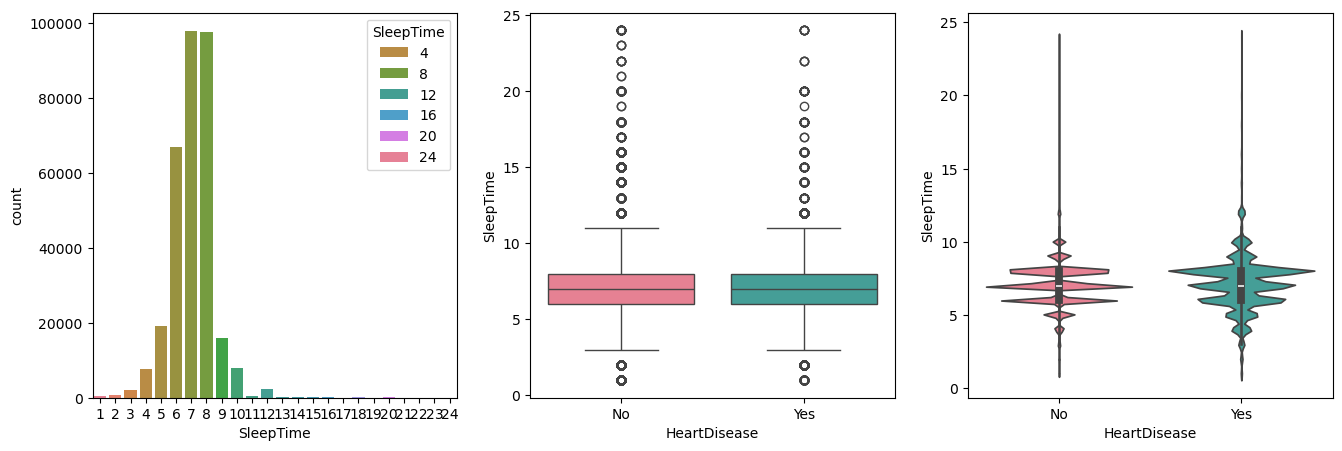

In [63]:
# Graficos 'SleepTime'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='SleepTime', data=df, hue='SleepTime', palette='husl', ax=axes[0])
sns.boxplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[1])
sns.violinplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: Asthma

In [64]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

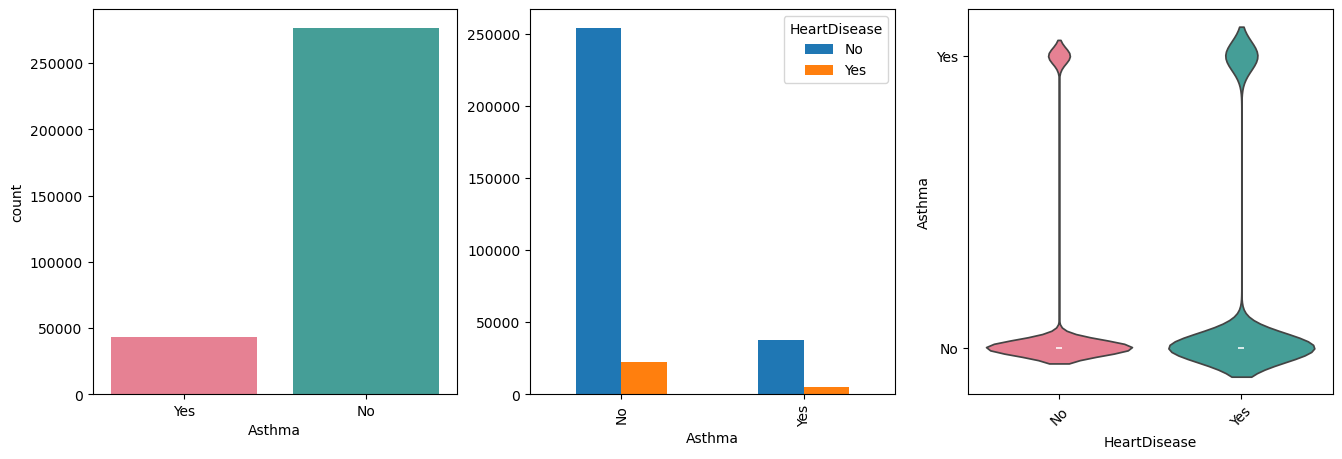

In [65]:
# Graficos 'Asthma'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Asthma', data=df, hue='Asthma', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Asthma', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Asthma', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: KidneyDisease

In [66]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

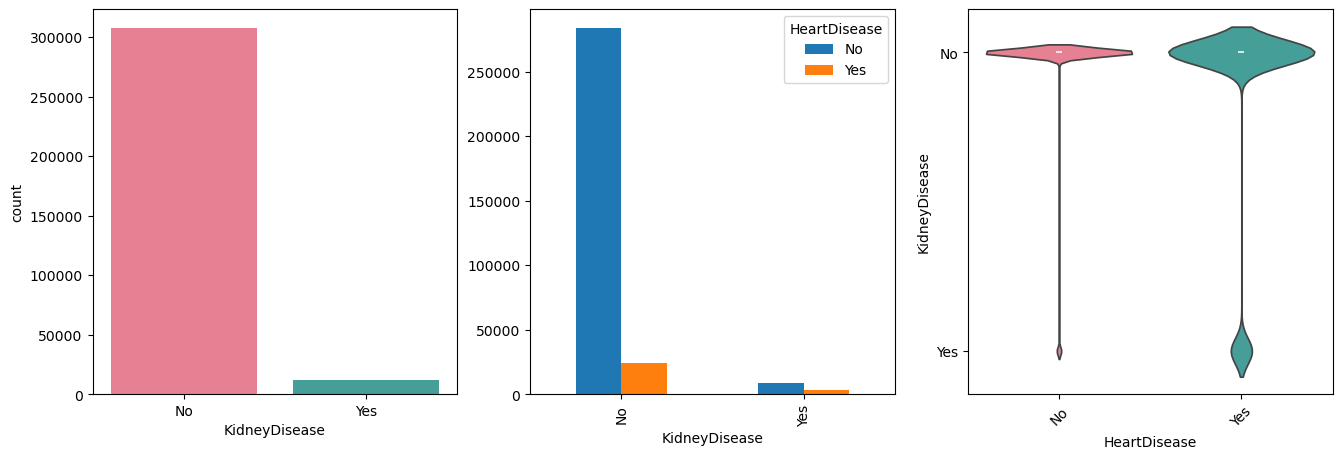

In [67]:
# Graficos 'KidneyDisease'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='KidneyDisease', data=df, hue='KidneyDisease', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['KidneyDisease', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='KidneyDisease', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: SkinCancer

In [68]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

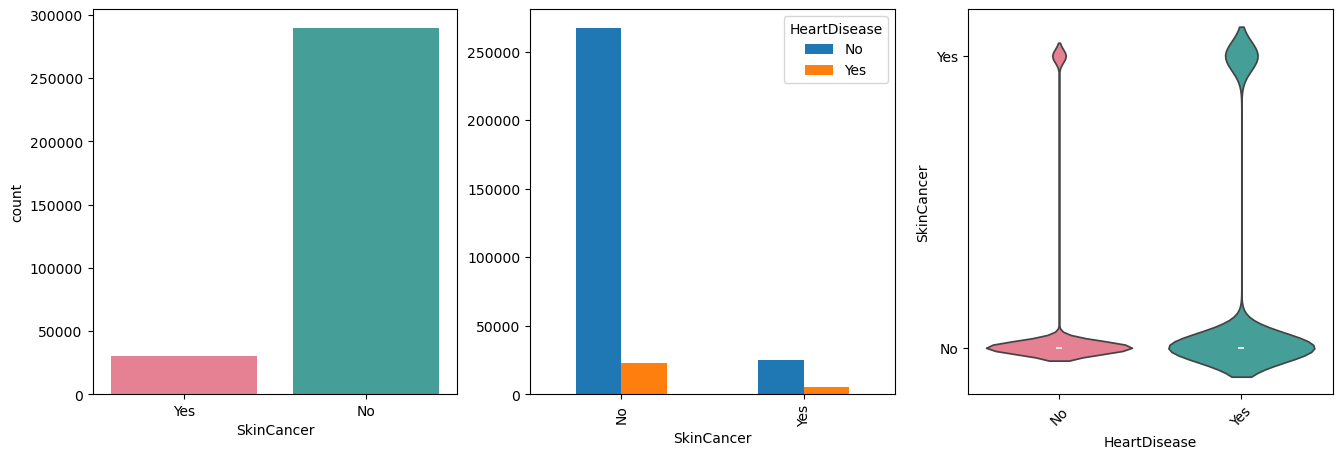

In [69]:
# Graficos 'SkinCancer'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='SkinCancer', data=df, hue='SkinCancer', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['SkinCancer', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='SkinCancer', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

# 04. Modelos, Métricas y Métodos de Validación

En esta etapa vamos a implementar los modelos de Machine Learning que se adecuen mejor al problema y como consecuencia las métricas de cada modelo.

*  Primero vamos a entrenar diferentes modelos y calcular todas las métricas y dependiendo de la naturaleza del problema vamos a seleccionar el modelo que mejor desempeño tiene, utilizando los 3 métodos de validación.

*  Luego vamos a hacerle "Tuning" con GridSearchCV para encontrar los mejores parámetros para el modelo.

En caso de estar haciendo un Algoritmo Genético o un Recomendador el objetivo de esta parte deberá ser el de mejorar el modelo para que sea más eficiente.

Verificación de columnas al azar para su posterior modificación.

In [70]:
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
219829,No,29.16,No,No,No,0,0,No,Male,18-24,White,No,Yes,Good,8,No,No,No
40076,No,27.37,Yes,No,No,0,0,No,Male,18-24,White,No,Yes,Excellent,9,No,No,No
272701,No,43.40,No,No,No,0,0,No,Male,40-44,White,No,Yes,Very good,7,No,No,No
282009,No,24.48,Yes,No,No,0,0,No,Male,55-59,White,No,Yes,Excellent,8,No,No,No
261085,No,22.42,Yes,No,No,0,0,No,Male,60-64,Hispanic,No,Yes,Good,8,No,No,No


Duplicación del DF original para realizar los encodings necesarios y prepararlo para el Machine Learning

In [71]:
df_ml = df.copy()
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
71221,No,34.38,No,No,No,0,0,No,Male,50-54,Hispanic,No,Yes,Good,7,No,No,No
62402,No,20.75,No,No,No,0,0,No,Male,50-54,White,No,Yes,Excellent,6,No,No,Yes
207302,No,24.97,No,No,No,0,0,No,Male,65-69,Asian,No,No,Very good,7,No,No,No
150780,No,26.40,Yes,No,No,0,0,No,Male,65-69,White,Yes,Yes,Very good,7,No,No,Yes
58124,No,23.19,No,No,No,0,0,No,Male,45-49,White,No,Yes,Excellent,6,No,No,No


Encoding de variables Binarias para cambiar los valores a 0 y 1

In [72]:
columns_yes_no = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns_yes_no:
    df_ml[column] = df_ml[column].map({'Yes':1, 'No':0})

df_ml['Sex'] = df_ml['Sex'].map({'Male':0, 'Female':1})

df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
38019,0,27.29,1,0,0,0,0,0,1,60-64,White,No,1,Excellent,8,0,0,0
248483,0,29.66,1,0,0,1,1,1,1,65-69,White,No,0,Fair,7,0,0,0
203306,1,27.12,0,0,0,20,2,1,0,70-74,White,Yes,0,Fair,7,0,0,0
180247,0,18.89,1,0,0,15,3,1,1,70-74,White,No,1,Good,5,1,0,0
126413,1,25.10,0,0,0,3,2,1,0,55-59,Asian,No,1,Fair,6,0,0,0




Modificación de la variable 'AgeCategory' de categorica STR a categorica INT

siendo 0 el valor menor y 12 el valor mayor.


In [73]:
def Age_Category(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == '18-24':
    return 0
  elif x == '25-29':
    return 1
  elif x == '30-34':
    return 2
  elif x == '35-39':
    return 3
  elif x == '40-44':
    return 4
  elif x == '45-49':
    return 5
  elif x == '50-54':
    return 6
  elif x == '55-59':
    return 7
  elif x == '60-64':
    return 8
  elif x == '65-69':
    return 9
  elif x == '70-74':
    return 10
  elif x == '75-79':
    return 11
  elif x == '80 or older':
    return 12

In [74]:
df_ml['AgeCategory'] = df_ml['AgeCategory'].apply(Age_Category)
df_ml

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,7,White,Yes,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,12,White,No,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,9,White,Yes,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,11,White,No,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,4,White,No,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,0,8,Hispanic,Yes,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,0,3,Hispanic,No,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,1,5,Hispanic,No,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,1,1,Hispanic,No,0,Good,12,0,0,0


Modificación de la variable 'Diabetic' de categorica STR a categorica INT siendo 0 el valor menor y 3 el valor mayor

In [75]:
def Diabetic_clasification(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == 'No':
    return 0
  elif x == 'No, borderline diabetes':
    return 1
  elif x == 'Yes (during pregnancy)':
    return 2
  elif x == 'Yes':
    return 3


In [76]:
df_ml['Diabetic'] = df_ml['Diabetic'].apply(Diabetic_clasification)
df_ml

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,7,White,3,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,12,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,9,White,3,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,11,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,4,White,0,1,Very good,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,0,8,Hispanic,3,0,Fair,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,0,3,Hispanic,0,1,Very good,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,1,5,Hispanic,0,1,Good,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,1,1,Hispanic,0,0,Good,12,0,0,0


Modificación de la variable 'GenHealth' de categorica STR a categorica INT
siendo 0 el valor menor y 4 el valor mayor.

In [77]:
def health_clasification(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == 'Poor':
    return 0
  elif x == 'Fair':
    return 1
  elif x == 'Good':
    return 2
  elif x == 'Very good':
    return 3
  elif x == 'Excellent':
    return 4

In [78]:
df_ml['GenHealth'] = df_ml['GenHealth'].apply(health_clasification)

In [79]:
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
117746,1,38.65,1,0,0,30,30,1,0,10,White,1,0,0,6,0,1,1
234902,0,24.33,1,0,0,0,3,0,0,0,White,0,1,2,8,0,0,0
209737,0,28.25,1,0,0,3,5,0,1,8,White,0,0,2,6,0,0,0
281098,0,31.01,1,0,0,3,5,0,0,8,White,0,1,2,5,0,0,0
32156,1,23.08,0,0,0,2,10,0,1,10,White,0,1,2,6,0,0,1


Aplicación de logaritmo a la Variable BMI

In [80]:
df_ml['BMI'] = df_ml['BMI'].apply(np.log)
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
114238,1,3.174297,1,0,1,27,1,0,1,9,Black,0,1,1,5,0,0,0
105197,0,3.164208,0,0,0,0,0,0,0,1,Asian,0,1,4,7,0,0,0
306511,0,3.312002,0,0,0,0,0,0,1,7,White,3,1,2,6,1,0,0
249300,0,3.252311,1,0,0,20,20,1,1,6,White,0,0,1,6,1,0,0
10056,0,3.554205,1,0,0,0,0,0,1,3,White,0,0,2,7,0,0,0


Se elimina la variable 'Race' y se concatena el df_ml con el df_race para agregar las nuevas variables encodeadas sin prioridad en la Raza



In [81]:
df_ml = df_ml.drop('Race', axis=1)
df_ml

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,2.809403,1,0,0,3,30,0,1,7,3,1,3,5,1,0,1
1,0,3.012589,0,0,1,0,0,0,1,12,0,1,3,7,0,0,0
2,0,3.280159,1,0,0,20,30,0,0,9,3,1,1,8,1,0,0
3,0,3.186766,0,0,0,0,0,0,1,11,0,0,2,6,0,0,1
4,0,3.165897,0,0,0,28,0,1,1,4,0,1,3,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,3.310908,1,0,0,7,0,1,0,8,3,0,1,6,1,0,0
319791,0,3.395850,1,0,0,0,0,0,0,3,0,1,3,5,1,0,0
319792,0,3.188004,0,0,0,0,0,0,1,5,0,1,2,6,0,0,0
319793,0,3.490733,0,0,0,0,0,0,1,1,0,0,2,12,0,0,0


Concatenación de Dataframes 'df_ml' y 'df_race'


In [82]:
df_ml = pd.concat([df_ml, df_race], axis = 1)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

In [83]:
df_ml.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
260956,0,3.166740,0,0,0,0,0,0,0,5,0,1,3,7,0,0,0,0,0,0,0,0,1
219713,0,3.194993,1,0,0,1,0,0,0,1,0,1,4,7,0,0,0,0,0,0,0,0,1
231882,1,3.390473,0,0,0,0,0,0,0,9,0,1,3,8,0,0,0,0,0,0,0,0,1
262508,0,3.423285,1,0,0,1,0,1,1,12,0,1,2,9,0,1,0,0,0,0,0,0,1
218699,0,3.222868,0,0,0,0,0,0,0,10,0,1,4,7,0,0,0,0,0,0,0,0,1


Eliminación de valores Nan

In [84]:
df_ml.dropna(inplace = True)

Eliminación de Outliers

In [85]:
def filtrar_outliers(serie):
    Q1 = df_ml[serie].quantile(0.25)
    Q3 = df_ml[serie].quantile(0.75)

    ric = Q3 - Q1

    lim_l = Q1 - 1.5*ric
    lim_r = Q3 + 1.5*ric

    return df_ml[df_ml[serie].between(lim_l, lim_r)]

In [86]:
df_ml = filtrar_outliers("BMI")
df_ml = filtrar_outliers("SleepTime")

Distribución de variables para el entrenamiento y predicción. Variable a predecir (Target): HeartDisease

In [87]:
df_ml_copy = df_ml.copy()

X = df_ml_copy.drop('HeartDisease', axis = 1)
y = df_ml_copy['HeartDisease']

In [88]:
df_ml_copy

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,2.809403,1,0,0,3,30,0,1,7,3,1,3,5,1,0,1,0,0,0,0,0,1
1,0,3.012589,0,0,1,0,0,0,1,12,0,1,3,7,0,0,0,0,0,0,0,0,1
2,0,3.280159,1,0,0,20,30,0,0,9,3,1,1,8,1,0,0,0,0,0,0,0,1
3,0,3.186766,0,0,0,0,0,0,1,11,0,0,2,6,0,0,1,0,0,0,0,0,1
4,0,3.165897,0,0,0,28,0,1,1,4,0,1,3,8,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,3.100993,0,0,0,0,0,0,1,0,0,1,4,8,0,0,0,0,0,0,1,0,0
319790,1,3.310908,1,0,0,7,0,1,0,8,3,0,1,6,1,0,0,0,0,0,1,0,0
319791,0,3.395850,1,0,0,0,0,0,0,3,0,1,3,5,1,0,0,0,0,0,1,0,0
319792,0,3.188004,0,0,0,0,0,0,1,5,0,1,2,6,0,0,0,0,0,0,1,0,0


Distribución de variables a un 0.20 con train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Normalización de Datos con el metodo MinMaxScaler.

In [90]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Funcíon de Entrenamiento y Evaluación de Modelos

In [91]:
# Función para entrenar y evaluar un modelo
def func_train_and_evaluate_model(modelo, nombre_modelo):
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, 'predict_proba') else modelo.decision_function(X_test)

    matriz_confusion = confusion_matrix(y_test, y_predict).tolist()
    reporte_clasificacion = classification_report(y_test, y_predict, output_dict=True)

    # Creacion DF
    df_temp_eval_modelo = pd.DataFrame()
    df_temp_eval_modelo = [{
        'nombre_modelo':modelo,
        'positivos_cor':matriz_confusion[0][0],
        'positivos_inc':matriz_confusion[0][1],
        'negativos_cor':matriz_confusion[1][0],
        'negativos_inc':matriz_confusion[1][1],
        'precision_yes':reporte_clasificacion['1']['precision'],
        'recall_yes':reporte_clasificacion['1']['recall'],
        'f1-score_yes':reporte_clasificacion['1']['f1-score'],
        'support_yes':reporte_clasificacion['1']['support'],
        'precision_no':reporte_clasificacion['0']['precision'],
        'recall_no':reporte_clasificacion['0']['recall'],
        'f1-score_no':reporte_clasificacion['0']['f1-score'],
        'support_no':reporte_clasificacion['0']['support']
        }]

    # print(f'Resultados para {nombre_modelo}:\n')
    # print(confusion_matrix(y_test, y_predict))
    # print(classification_report(y_test, y_predict))
    # print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob)}\n')
    # print('-' * 60)

    return df_temp_eval_modelo

modelos = [
    (LogisticRegression(max_iter = 1000), 'Regresión logística'),
    (DecisionTreeClassifier(), 'Árbol de decisión'),
    (RandomForestClassifier(), 'Random forest'),
    (GradientBoostingClassifier(), 'Gradient boosting'),
    (AdaBoostClassifier(), 'Adaboost'),
    (KNeighborsClassifier(), 'KNN'),
    (GaussianNB(), 'Gaussian NB'),
    (LinearDiscriminantAnalysis(), 'LDA'),
    (QuadraticDiscriminantAnalysis(), 'QDA')
    ]

Entrenamiento y evaluación de Modelos ML

In [92]:
df_evaluacion_modelo = pd.DataFrame()
for modelo, nombre in modelos:
  df_temp_eval_modelo = pd.DataFrame(func_train_and_evaluate_model(modelo, nombre))
  df_evaluacion_modelo = pd.concat([df_evaluacion_modelo, df_temp_eval_modelo], ignore_index=True)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:949: UserWarning:

Variables are collinear



In [93]:
df_evaluacion_modelo

,nombre_modelo,positivos_cor,positivos_inc,negativos_cor,negativos_inc,precision_yes,recall_yes,f1-score_yes,support_yes,precision_no,recall_no,f1-score_no,support_no
0,LogisticRegression(max_iter=1000),56351,468,4661,567,0.547826,0.108454,0.181063,5228.0,0.923605,0.991763,0.956472,56819.0
1,DecisionTreeClassifier(),52327,4492,3902,1326,0.227913,0.253634,0.240087,5228.0,0.930605,0.920942,0.925748,56819.0
2,"(DecisionTreeClassifier(max_features='sqrt', r...",55678,1141,4619,609,0.348000,0.116488,0.174549,5228.0,0.923396,0.979919,0.950818,56819.0
3,([DecisionTreeRegressor(criterion='friedman_ms...,56427,392,4753,475,0.547866,0.090857,0.155865,5228.0,0.922311,0.993101,0.956398,56819.0
4,"(DecisionTreeClassifier(max_depth=1, random_st...",56289,530,4601,627,0.541919,0.119931,0.196398,5228.0,0.924438,0.990672,0.956409,56819.0
5,KNeighborsClassifier(),55595,1224,4524,704,0.365145,0.134660,0.196758,5228.0,0.924749,0.978458,0.950846,56819.0
6,GaussianNB(),49238,7581,2576,2652,0.259162,0.507269,0.343057,5228.0,0.950284,0.866576,0.906502,56819.0
7,LinearDiscriminantAnalysis(),55349,1470,4084,1144,0.437643,0.218822,0.291762,5228.0,0.931284,0.974128,0.952224,56819.0
8,QuadraticDiscriminantAnalysis(),49325,7494,2699,2529,0.252320,0.483741,0.331650,5228.0,0.948120,0.868107,0.906351,56819.0


### Conclusiones

El modelo de **Gradient Boosting** y **Regresión Logística** han mostrado el mejor rendimiento global en términos de precisión, recall y ROC AUC Score. Ambos tienen una precisión en clase 0 (no enfermo) muy alta, pero una precisión y recall más bajos en la clase 1 (enfermo).

# Evalución con RandomForest y GradientBoosting

In [94]:
# Validación Cruzada y Ajuste de Hiperparámetros para Random Forest

# Definir el conjunto de hiperparámetros para Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200, 250],  # Número de árboles en el bosque
                 'max_depth': [None, 10, 20, 30], # Profundidad máxima de cada árbol
                 'min_samples_leaf': [1, 2, 4], # Número mínimo de muestras requeridas para estar en una hoja
                 'criterion': ['gini', 'entropy'], # Función para medir la calidad de una división
                 'max_features': ['auto', 'sqrt', 'log2'] # Número de características a considerar para la mejor división
}

# Inicializar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = rf_model, # Modelo
                           param_grid = param_grid_rf, # Hiperparámetros
                           cv = 5, # Número de divisiones para cada validación
                           scoring = 'roc_auc', # Métrica
                           verbose = 1) # Detalle de salida (info básica)

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores hiperparámetros encontrados:\n{best_params}")
print(f"Mejor ROC AUC Score encontrado: {best_score}")

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob = best_rf_model.predict_proba(X_test)[:, 1] # Solo se toma la probabilidad de la clase positiva ('[:, 1]')

# Calcular y mostrar el ROC AUC Score en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score en conjunto de prueba: {roc_auc}")

# Mostrar la importancia de las característicaS
# Si el modelo tiene el atributo 'feature_importances_' se crea un DF con la importancia de las características, ordenando de mayor a menos importancia
if hasattr(best_rf_model, 'feature_importances_'):
    feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index = X_train.columns, columns = ['Importancia'])
    feature_importances = feature_importances.sort_values(by = 'Importancia', ascending = False)
    print("\nImportancia de las características:")
    print(feature_importances)

# Visualizar la importancia de las 10 características más importantes
plt.figure(figsize = (10, 6))
plt.barh(feature_importances.index[:10], feature_importances['Importancia'][:10], align = 'center')
plt.xlabel('Importancia')
plt.title('Importancia de las características')
plt.show()

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [ ]:
# Validación Cruzada y Ajuste de Hiperparámetros para Gradient Boosting

# Definir el conjunto de hiperparámetros para Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200, 250], # Número de árboles en el bosque
                 'learning_rate': [0.001, 0.01, 0.1], # Tasa de aprendizaje
                 'max_depth': [3, 5, 7], # Profundidad máxima de cada árbol
                 'max_features': ['sqrt', 'log2', None] # Número de características a considerar para la mejor división
}

# Inicializar el modelo GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state = 42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = gb_model, # Modelo
                           param_grid = param_grid_gb, # Hiperparámetros
                           cv = 5, # Número de divisiones para cada validación
                           scoring = 'roc_auc', # Métrica
                           verbose = 1) # Detalle de salida (info básica)

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores hiperparámetros encontrados:\n{best_params}")
print(f"Mejor ROC AUC Score encontrado: {best_score}")

# Obtener el mejor modelo entrenado
best_gb_model = grid_search.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob = best_gb_model.predict_proba(X_test)[:, 1] # Solo se toma la probabilidad de la clase positiva ('[:, 1]')

# Calcular y mostrar el ROC AUC Score en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score en conjunto de prueba: {roc_auc}")

# Mostrar la importancia de las característicaS
# Si el modelo tiene el atributo 'feature_importances_' se crea un DF con la importancia de las características, ordenando de mayor a menos importancia
if hasattr(best_gb_model, 'feature_importances_'):
    feature_importances = pd.DataFrame(best_gb_model.feature_importances_, index = X_train.columns, columns = ['Importancia'])
    feature_importances = feature_importances.sort_values(by = 'Importancia', ascending = False)
    print("\nImportancia de las características:")
    print(feature_importances)

# Visualizar la importancia de las 10 características más importantes
plt.figure(figsize = (10, 6))
plt.barh(feature_importances.index[:10], feature_importances['Importancia'][:10], align = 'center')
plt.xlabel('Importancia')
plt.title('Importancia de las características')
plt.show()

Gradient Boosting parece ofrecer un mejor rendimiento general en términos de precisión, recall y F1-score para la clase positiva (casos de enfermedad cardíaca) en comparación con Random Forest


# Ajuste del Umbral de Decisión

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state = 42)

# Parámetros ajustados
param_grid = {
    'n_estimators': [50, 100, 200, 250],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = gradient_boosting, param_grid = param_grid, scoring = 'roc_auc', cv = 5, verbose = 1, n_jobs = -1)

grid_search.fit(X, y)

# Mejores parámetros y score
print('Mejores parámetros encontrados:')
print(grid_search.best_params_)
print()
print(f'Mejor ROC AUC score encontrado: {grid_search.best_score_:.4f}')

Después de realizar el ajuste de hiperparámetros utilizando Grid Search Cross-Validation, encontramos que el mejor modelo Gradient Boosting Classifier tiene los siguientes parámetros optimizados:

- Mejores parámetros encontrados: {}
- Mejor ROC AUC score encontrado:

In [ ]:
# calcular las métricas con los mejores parámetros

# 05. Resultados y Conclusiones

Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

Rendimiento del Modelo: El modelo Gradient Boosting Classifier optimizado muestra una capacidad significativa para predecir la variable objetivo (Heart Disease) con un ROC AUC promedio de '' en validación cruzada y '' en el conjunto de prueba independiente.

# 06. Storytelling

Como último vamos a hacer una pequeña presentación de principio a fin sobre el proyecto, esta presentación puede incluir:

*  Motivaciones del proyecto.

*  Alcance del proyecto.

*  Herramientas o tecnologías usadas.

*  Desafíos en cada parte del proceso.

*  Resolución de cada desafío o problema.

*  Un esquema de lo que fue el proyecto.

*  Visualizaciones y resultados.

Todos los miembros del equipo deben participar, no es obligatorio hacer una presentación o material audiovisual. Esta parte no será evaluada.